# Retail Lab (Data Transformation Stage)

**Learning Objectives:**
  * Practice basic statistical analysis techniques
  * Gain exposure to retail related DataSets

## Context of the datasets

### 1. There are three datasets: `articles.csv.zip`, `customers.csv.zip` and `transactions2020.csv.zip`

#### 2. The Articles dataset contains information over products available.
#### 3. The Customers dataset contains information over registered customers.
#### 4. The Transactions dataset contains purchases of articles made by customers.



## 1. Library Import

In [1]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
warnings.simplefilter('ignore')

## 2. Data loading and DataFrame creation

In [3]:
Articles=pd.read_csv("https://github.com/thousandoaks/Python4DS-I/raw/main/datasets/articles.csv.zip")

In [4]:
Articles.head(3)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [5]:
Articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [6]:
Customers=pd.read_csv("https://github.com/thousandoaks/Python4DS-I/raw/main/datasets/customers.csv.zip")

In [7]:
Customers.sample(3)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
194588,2444759c2abdb4b09b697594417ffeddcdfb4c532337a7...,NaN,NaN,ACTIVE,NONE,41.0,334da24d750a0ec74260aca4ba1a2e4bdabf956652db4c...
857522,a01164f963a4da38cab0f91a9fe20d67f1680edd24a062...,1.0,1.0,ACTIVE,Regularly,33.0,5608d1c65fa64a454afd6fe00ade59be7067537f7e2570...
447355,539d7227c46425ccdfdd8fede08d5b8469b2f384fa43b8...,1.0,1.0,ACTIVE,Regularly,24.0,1702006e66edadf680e96eb27adbcd39ae02d8d13c567c...


In [8]:
Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355969 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [9]:
Transactions=pd.read_csv("https://github.com/thousandoaks/Python4DS-I/raw/main/datasets/transactions2020.csv.zip")

In [10]:
Transactions.sample(3)

,t_dat,customer_id,article_id,price,sales_channel_id
4519652,2020-09-05,5d1eebb0f3c3da89f38973a7ccc7f36d8bfeeee981953c...,923134001,0.025407,1
1710270,2020-06-30,1de3a6cc4a03349b503c07b6d0c0a0bada320c5c93017a...,759871002,0.006763,1
3727964,2020-08-14,e36075dc6344a51be41b816a291845502edf1edf594554...,909921001,0.025407,2


In [11]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5151470 entries, 0 to 5151469
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 196.5+ MB


## 3. Merging DataFrames

#### 3.1. Transactions-Articles


In [12]:
Transactions.head(3)

,t_dat,customer_id,article_id,price,sales_channel_id
0,2020-06-01,00075ef36696a7b4ed8c83e22a4bf7ea7c90ee110991ec...,844198001,0.016932,2
1,2020-06-01,000b31552d3785c79833262bbeefa484cbc43d7b612b3c...,777016001,0.030492,1
2,2020-06-01,002d8d26c9414c981c012c6f5e4b2de7ffd3bc568c4574...,820507001,0.010153,2


In [13]:
Articles.head(3)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [14]:
## we merge both DataFrames using the common key: article_id. We store the result in a new DataFrame
TransactionsAndArticles=pd.merge(Transactions, Articles, how='left',on='article_id')

#### 3.2. Transactions-Articles-Customers

In [15]:
TransactionsAndArticles.head(3)

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,2020-06-01,00075ef36696a7b4ed8c83e22a4bf7ea7c90ee110991ec...,844198001,0.016932,2,844198,Saturn trs (J),296,Pyjama bottom,Nightwear,...,Nightwear,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1017,"Under-, Nightwear",Pyjama bottoms in sweatshirt fabric with wide ...
1,2020-06-01,000b31552d3785c79833262bbeefa484cbc43d7b612b3c...,777016001,0.030492,1,777016,Cisco skirt,275,Skirt,Garment Lower body,...,Trousers & Skirt,A,Ladieswear,1,Ladieswear,18,Womens Trend,1009,Trousers,"Calf-length skirt in softly draping, patterned..."
2,2020-06-01,002d8d26c9414c981c012c6f5e4b2de7ffd3bc568c4574...,820507001,0.010153,2,820507,Charlotte Hipster Primula,286,Underwear bottom,Underwear,...,Expressive Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Hipster briefs in lace with a mid waist, lined..."


In [16]:
Customers.head(3)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...


In [17]:
## we merge both DataFrames using the common key: customer_id. We store the result in a new DataFrame
TransactionsAndArticlesAndCustomers=pd.merge(TransactionsAndArticles, Customers, how='left',on='customer_id')

In [18]:
TransactionsAndArticlesAndCustomers.head(3)

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,2020-06-01,00075ef36696a7b4ed8c83e22a4bf7ea7c90ee110991ec...,844198001,0.016932,2,844198,Saturn trs (J),296,Pyjama bottom,Nightwear,...,"Womens Nightwear, Socks & Tigh",1017,"Under-, Nightwear",Pyjama bottoms in sweatshirt fabric with wide ...,NaN,NaN,ACTIVE,NONE,40.0,0c0e15f8fa88a1d4aa6ca8a0b4a8289ca1affbaebdea22...
1,2020-06-01,000b31552d3785c79833262bbeefa484cbc43d7b612b3c...,777016001,0.030492,1,777016,Cisco skirt,275,Skirt,Garment Lower body,...,Womens Trend,1009,Trousers,"Calf-length skirt in softly draping, patterned...",1.0,1.0,ACTIVE,Regularly,59.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
2,2020-06-01,002d8d26c9414c981c012c6f5e4b2de7ffd3bc568c4574...,820507001,0.010153,2,820507,Charlotte Hipster Primula,286,Underwear bottom,Underwear,...,Womens Lingerie,1017,"Under-, Nightwear","Hipster briefs in lace with a mid waist, lined...",NaN,NaN,ACTIVE,NONE,23.0,8d4ceb946237cf52ce5c2a1a71d1221fde77627a52d661...


In [19]:
TransactionsAndArticlesAndCustomers.sample(3).T

,2547157,2691470,2952170
t_dat,2020-07-18,2020-07-22,2020-07-28
customer_id,7e74fb32b0a5d8f5bd80a3a504c0058dcd25d9f8096987...,47e71fb8e21219db5e1c3e74f03ebbb833767f96418e42...,75c2330d57daeec43c3bbc14578869ad6e5ff8ea1a9a35...
article_id,863980003,599580020,828116001
price,0.030492,0.008458,0.042356
sales_channel_id,1,2,2
product_code,863980,599580,828116
prod_name,Nicole anglais,Timeless Midrise Brief,Pernilla Jumper
product_type_no,258,59,252
product_type_name,Blouse,Swimwear bottom,Sweater
product_group_name,Garment Upper body,Swimwear,Garment Upper body


In [47]:
TransactionsAndArticlesAndCustomers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5151470 entries, 0 to 5151469
Data columns (total 37 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   t_dat                           object 
 1   customer_id                     object 
 2   article_id                      int64  
 3   price                           float64
 4   sales_channel_id                int64  
 5   product_code                    int64  
 6   prod_name                       object 
 7   product_type_no                 int64  
 8   product_type_name               object 
 9   product_group_name              object 
 10  graphical_appearance_no         int64  
 11  graphical_appearance_name       object 
 12  colour_group_code               int64  
 13  colour_group_name               object 
 14  perceived_colour_value_id       int64  
 15  perceived_colour_value_name     object 
 16  perceived_colour_master_id      int64  
 17  perceived_colour_master_nam

In [34]:
del Articles, Customers, Transactions

NameError: name 'Articles' is not defined

In [20]:
TransactionsAndArticlesAndCustomers.groupby('sales_channel_id').count()

,t_dat,customer_id,article_id,price,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,...,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
sales_channel_id,,,,,,,,,,,,,,,,,,,,,
1,1788396,1788396,1788396,1788396,1788396,1788396,1788396,1788396,1788396,1788396,...,1788396,1788396,1788396,1786791,817650,804129,1787640,1780039,1779148,1788396
2,3363074,3363074,3363074,3363074,3363074,3363074,3363074,3363074,3363074,3363074,...,3363074,3363074,3363074,3361065,1502625,1482103,3356625,3358923,3352518,3363074


In [21]:
TransactionsAndArticlesAndCustomers.groupby('fashion_news_frequency').count()

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,section_no,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,age,postal_code
fashion_news_frequency,,,,,,,,,,,,,,,,,,,,,
Monthly,954,954,954,954,954,954,954,954,954,954,...,954,954,954,954,953,947,926,954,952,954
NONE,2811991,2811991,2811991,2811991,2811991,2811991,2811991,2811991,2811991,2811991,...,2811991,2811991,2811991,2811991,2809906,1212,814,2806374,2797394,2811991
Regularly,2326017,2326017,2326017,2326017,2326017,2326017,2326017,2326017,2326017,2326017,...,2326017,2326017,2326017,2326017,2324499,2318116,2284492,2325309,2321747,2326017


In [22]:
TransactionsAndArticlesAndCustomers.groupby('club_member_status').count()

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,section_no,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,fashion_news_frequency,age,postal_code
club_member_status,,,,,,,,,,,,,,,,,,,,,
ACTIVE,5082441,5082441,5082441,5082441,5082441,5082441,5082441,5082441,5082441,5082441,...,5082441,5082441,5082441,5082441,5078877,2315032,2281184,5071449,5067537,5082441
LEFT CLUB,559,559,559,559,559,559,559,559,559,559,...,559,559,559,559,559,0,0,559,559,559
PRE-CREATE,61265,61265,61265,61265,61265,61265,61265,61265,61265,61265,...,61265,61265,61265,61265,61217,4518,4325,60629,57269,61265


## 4. Basic Statistical Analysis
### In this section we will try to gather information on the distribution of:
#### (1) Sales Channel
#### (2) fashion_news_frequency
#### (2) Number of transactions per day

#### 4.1. Sales Channel
#### For any given transaction we observe whether the sales channel was '1' or '2'

In [23]:
TransactionsAndArticlesAndCustomers[['t_dat','sales_channel_id']]

,t_dat,sales_channel_id
0,2020-06-01,2
1,2020-06-01,1
2,2020-06-01,2
3,2020-06-01,2
4,2020-06-01,2
...,...,...
5151465,2020-09-22,2
5151466,2020-09-22,2
5151467,2020-09-22,1
5151468,2020-09-22,1


In [24]:
# we recode the values of the variable sales_channel_id
TransactionsAndArticlesAndCustomers['sales_channel_id_recoded'] = TransactionsAndArticlesAndCustomers['sales_channel_id'].replace([1, 2], [0, 1])


In [25]:
TransactionsAndArticlesAndCustomers[['t_dat','sales_channel_id','sales_channel_id_recoded']]

,t_dat,sales_channel_id,sales_channel_id_recoded
0,2020-06-01,2,1
1,2020-06-01,1,0
2,2020-06-01,2,1
3,2020-06-01,2,1
4,2020-06-01,2,1
...,...,...,...
5151465,2020-09-22,2,1
5151466,2020-09-22,2,1
5151467,2020-09-22,1,0
5151468,2020-09-22,1,0


<Axes: xlabel='sales_channel_id_recoded', ylabel='count'>

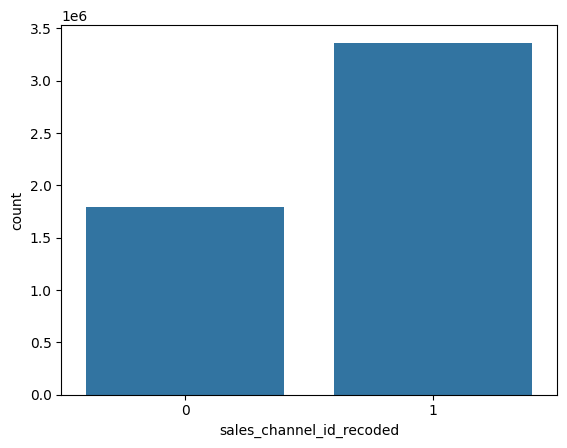

In [26]:
sns.countplot(TransactionsAndArticlesAndCustomers, x="sales_channel_id_recoded")

In [27]:
TransactionsAndArticlesAndCustomers['sales_channel_id_recoded'].mean()

0.6528377336954306

In [28]:
TransactionsAndArticlesAndCustomers['sales_channel_id_recoded'].var()

0.22664067115418418

### Based on the previous plot, the observed mean (0.65) and observed variance (0.22) we can safely asume that the distribution of the variable `Sales Channel` follows a Bernouilli Distribution with parameter 0.65


#### 4.2. Fashion_news_frequency
#### For any given transaction we observe whether the fashion_news_frequency was 'NONE' or 'REGULARLY' (we don't consider 'Monthly' as it has few occurences)

In [29]:
TransactionsAndArticlesAndCustomers.groupby('fashion_news_frequency').count()

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,age,postal_code,sales_channel_id_recoded
fashion_news_frequency,,,,,,,,,,,,,,,,,,,,,
Monthly,954,954,954,954,954,954,954,954,954,954,...,954,954,954,953,947,926,954,952,954,954
NONE,2811991,2811991,2811991,2811991,2811991,2811991,2811991,2811991,2811991,2811991,...,2811991,2811991,2811991,2809906,1212,814,2806374,2797394,2811991,2811991
Regularly,2326017,2326017,2326017,2326017,2326017,2326017,2326017,2326017,2326017,2326017,...,2326017,2326017,2326017,2324499,2318116,2284492,2325309,2321747,2326017,2326017


In [30]:
NotMonthlyFilter=TransactionsAndArticlesAndCustomers['fashion_news_frequency']!='Monthly'

In [31]:
TransactionsAndArticlesAndCustomers[NotMonthlyFilter].groupby('fashion_news_frequency').count()

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,age,postal_code,sales_channel_id_recoded
fashion_news_frequency,,,,,,,,,,,,,,,,,,,,,
NONE,2811991,2811991,2811991,2811991,2811991,2811991,2811991,2811991,2811991,2811991,...,2811991,2811991,2811991,2809906,1212,814,2806374,2797394,2811991,2811991
Regularly,2326017,2326017,2326017,2326017,2326017,2326017,2326017,2326017,2326017,2326017,...,2326017,2326017,2326017,2324499,2318116,2284492,2325309,2321747,2326017,2326017


In [ ]:
## we recode NONE to 0 and Regularly to 1





In [35]:
# prompt: replace in the column fashion_news_frequency the value NONE by 0 and Regulary by 1

TransactionsAndArticlesAndCustomers['fashion_news_frequency_recoded'] = TransactionsAndArticlesAndCustomers['fashion_news_frequency'].replace(['NONE', 'Regularly'], [0, 1])


In [36]:
TransactionsAndArticlesAndCustomers[NotMonthlyFilter].groupby('fashion_news_frequency_recoded').count()

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,sales_channel_id_recoded
fashion_news_frequency_recoded,,,,,,,,,,,,,,,,,,,,,
0,2811991,2811991,2811991,2811991,2811991,2811991,2811991,2811991,2811991,2811991,...,2811991,2811991,2809906,1212,814,2806374,2811991,2797394,2811991,2811991
1,2326017,2326017,2326017,2326017,2326017,2326017,2326017,2326017,2326017,2326017,...,2326017,2326017,2324499,2318116,2284492,2325309,2326017,2321747,2326017,2326017


<Axes: xlabel='fashion_news_frequency_recoded', ylabel='count'>

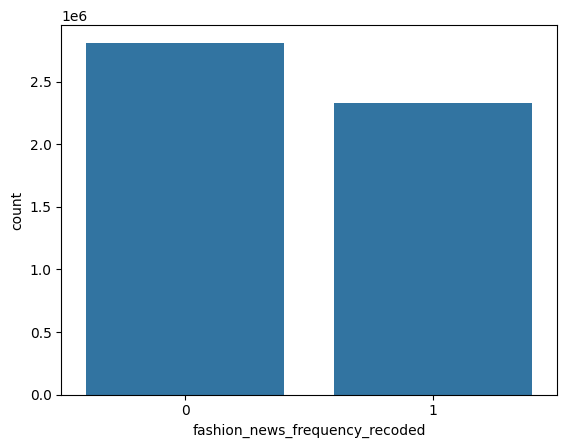

In [37]:
sns.countplot(TransactionsAndArticlesAndCustomers[NotMonthlyFilter], x="fashion_news_frequency_recoded")

In [38]:
TransactionsAndArticlesAndCustomers[NotMonthlyFilter]['fashion_news_frequency_recoded'].mean()

0.452707936616681

In [39]:
TransactionsAndArticlesAndCustomers[NotMonthlyFilter]['fashion_news_frequency_recoded'].var()

0.24776350896265328

In [41]:
(1-0.45)*0.45

0.24750000000000003

### Based on the previous plot, the observed mean (0.45) and observed variance (0.24) we can safely asume that the distribution of the variable `Fashion News Frequency` follows a Bernouilli Distribution with parameter 0.45


#### 4.2 Number of transactions per day
#### We count the number of transactions conducted on any given day

In [45]:
TransactionsAndArticlesAndCustomers.sort_values(by='t_dat').head(5)

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,sales_channel_id_recoded,fashion_news_frequency_recoded
0,2020-06-01,00075ef36696a7b4ed8c83e22a4bf7ea7c90ee110991ec...,844198001,0.016932,2,844198,Saturn trs (J),296,Pyjama bottom,Nightwear,...,"Under-, Nightwear",Pyjama bottoms in sweatshirt fabric with wide ...,NaN,NaN,ACTIVE,NONE,40.0,0c0e15f8fa88a1d4aa6ca8a0b4a8289ca1affbaebdea22...,1,0
28718,2020-06-01,aa8b7457b03af393762c6a75c63e46aeaee28e62de5a32...,878013001,0.050831,2,878013,Florida,265,Dress,Garment Full body,...,Dresses Ladies,"Calf-length, V-neck dress in a viscose weave w...",1.0,1.0,ACTIVE,Regularly,62.0,1d12f0057e93a92a36ee1b42405fe157170f2564ca397d...,1,1
28719,2020-06-01,aa99a433d1273116b062753352bda48d4247e504dd0dff...,786307001,0.015237,2,786307,Sandy,253,Vest top,Garment Upper body,...,Blouses,Sleeveless top in a crêpe weave with a V-neck ...,1.0,1.0,ACTIVE,Regularly,43.0,500339120f75a0d28db83f0017bd36dc2d78ee66a11695...,1,1
28720,2020-06-01,aa99a433d1273116b062753352bda48d4247e504dd0dff...,710194001,0.022017,2,710194,Sandy,253,Vest top,Garment Upper body,...,Blouses,Loose-fitting vest top in an airy satin weave ...,1.0,1.0,ACTIVE,Regularly,43.0,500339120f75a0d28db83f0017bd36dc2d78ee66a11695...,1,1
28721,2020-06-01,aa99a433d1273116b062753352bda48d4247e504dd0dff...,710194005,0.022017,2,710194,Sandy,253,Vest top,Garment Upper body,...,Blouses,Loose-fitting vest top in an airy satin weave ...,1.0,1.0,ACTIVE,Regularly,43.0,500339120f75a0d28db83f0017bd36dc2d78ee66a11695...,1,1


In [48]:
# prompt: cast t_dat into a datetime

import datetime as dt
TransactionsAndArticlesAndCustomers['t_dat_converted'] = pd.to_datetime(TransactionsAndArticlesAndCustomers['t_dat'])


In [78]:
TransactionsAndArticlesAndCustomersResampled=TransactionsAndArticlesAndCustomers.resample(rule='1D',on='t_dat_converted').count().reset_index()

pd.set_option('display.max_rows', 120)
TransactionsAndArticlesAndCustomersResampled

,t_dat_converted,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,...,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,sales_channel_id_recoded,fashion_news_frequency_recoded
0,2020-06-01,43084,43084,43084,43084,43084,43084,43084,43084,43084,...,43084,43050,19110,18855,43030,42986,42950,43084,43084,42986
1,2020-06-02,44666,44666,44666,44666,44666,44666,44666,44666,44666,...,44666,44626,18863,18659,44607,44543,44529,44666,44666,44543
2,2020-06-03,53187,53187,53187,53187,53187,53187,53187,53187,53187,...,53187,53122,23647,23291,53124,53003,52933,53187,53187,53003
3,2020-06-04,50470,50470,50470,50470,50470,50470,50470,50470,50470,...,50470,50427,22440,22159,50344,50334,50294,50470,50470,50334
4,2020-06-05,44470,44470,44470,44470,44470,44470,44470,44470,44470,...,44470,44415,19500,19258,44426,44347,44332,44470,44470,44347
5,2020-06-06,48649,48649,48649,48649,48649,48649,48649,48649,48649,...,48649,48589,21427,21147,48603,48453,48395,48649,48649,48453
6,2020-06-07,36733,36733,36733,36733,36733,36733,36733,36733,36733,...,36733,36702,17146,16880,36702,36662,36591,36733,36733,36662
7,2020-06-08,38117,38117,38117,38117,38117,38117,38117,38117,38117,...,38117,38073,16984,16703,38067,38051,37922,38117,38117,38051
8,2020-06-09,39370,39370,39370,39370,39370,39370,39370,39370,39370,...,39370,39326,17146,16899,39297,39273,39207,39370,39370,39273
9,2020-06-10,42585,42585,42585,42585,42585,42585,42585,42585,42585,...,42585,42539,18583,18287,42525,42465,42427,42585,42585,42465


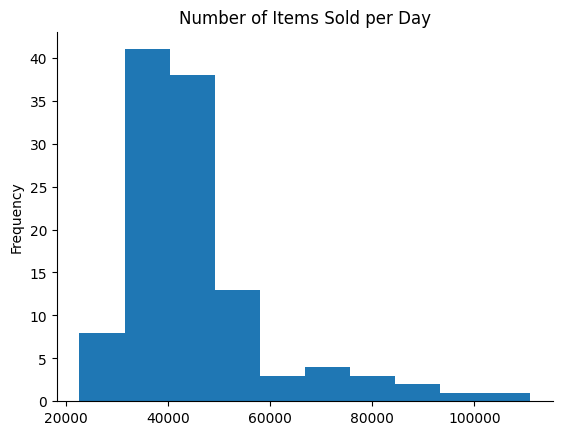

In [79]:
from matplotlib import pyplot as plt
TransactionsAndArticlesAndCustomersResampled['customer_id'].plot(kind='hist', bins=10, title='Number of Items Sold per Day')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [82]:
TransactionsAndArticlesAndCustomersResampled['customer_id'].mean()

45188.333333333336

In [83]:
TransactionsAndArticlesAndCustomersResampled['customer_id'].var()

215225495.72861353

In [85]:
p=45188/215225495
p

0.00020995653883848657

In [86]:
r=45188*p/(1-p)
r

9.489508461385363

### Based on the previous plot, the observed mean (45188) and observed variance (215225495.72861353) we can not assume that the number of items sold any given day follows a Poisson Distribution. The variance is not equal to the mean. A solution to this would be to asume alternative distributions (e.g. a Negative Binomial distribution).

### Assuming a Negative Binomial:

In [87]:
p=45188/215225495
p

0.00020995653883848657

In [88]:
r=45188*p/(1-p)
r

9.489508461385363

### Based on the previous we can model the distribution of items sold daily as a Negative Binomial with parameters: p=0.0002 and r=9.4895